In [43]:
pip install kmedoids

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pyclust

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install treelib

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [48]:
from pyclust import KMedoids
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import metric
import time

In [49]:
df = pd.read_csv("Country-data.csv")
X = df[['income', 'inflation', 'gdpp']]
X.head()

,income,inflation,gdpp
0,1610,9.44,553
1,9930,4.49,4090
2,12900,16.10,4460
3,5900,22.40,3530
4,19100,1.44,12200


In [50]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X_scaled)
y_kmed = kmedoids.fit_predict(X_scaled)

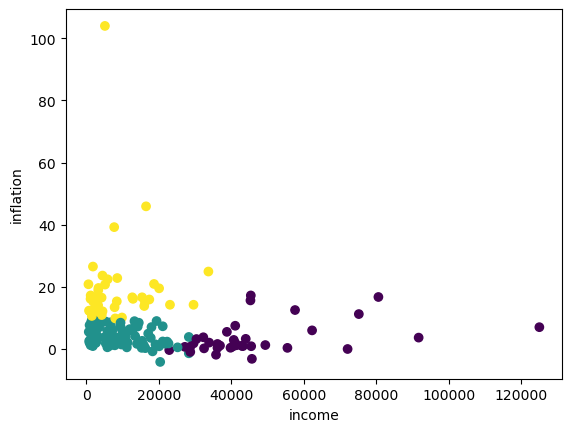

In [53]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmed)
plt.xlabel('income')
plt.ylabel('inflation')
plt.show()

In [54]:
kmedoids = KMedoids(n_clusters=2)
kmedoids.fit(X_scaled)
y_kmed = kmedoids.fit_predict(X_scaled)

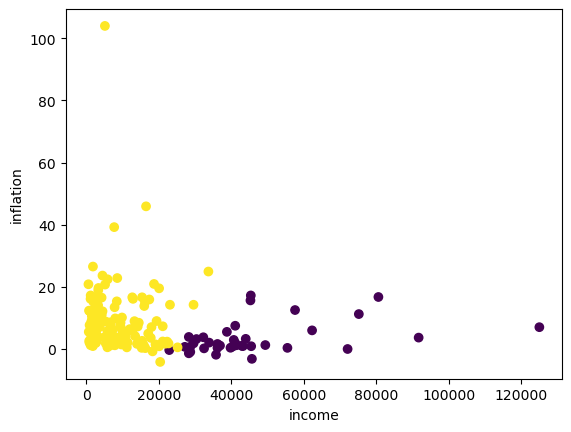

In [55]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmed)
plt.xlabel('income')
plt.ylabel('inflation')
plt.show()

# Accuracy

Text(0, 0.5, 'SW')

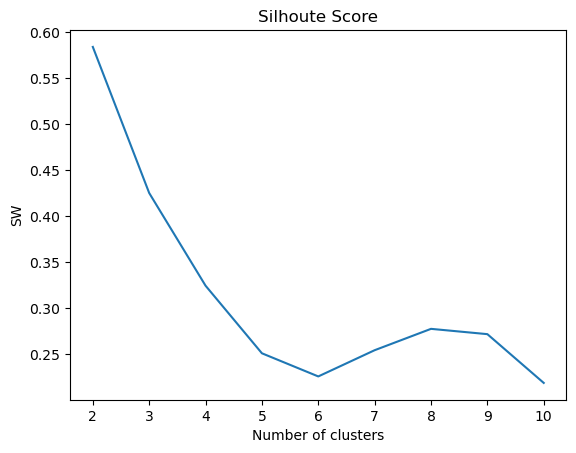

In [56]:
sw = []
for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(X_scaled)
    y_kmed = kMedoids.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_kmed)
    sw.append(silhouette_avg)
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')

# performance

In [57]:
from timeit import default_timer
start = default_timer()
duration = default_timer() - start
print(duration)

2.8400005248840898e-05
